# Single Output Regression

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

SEED = 42
HOME = Path.cwd().parent
RAW_PATH = HOME / 'data/raw'
print(RAW_PATH)
MAX_TIME = 3600

/home/rco/DS/kdd22/data/raw


In [2]:
pub = pd.read_csv(RAW_PATH / 'public.csv')
print(pub.shape)
pub.head()

(146262, 6)


,Filename,Altitude,Delta,North,East,kfold
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231,-0.386045,0.929772,0
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688,0.635584,0.152819,2
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576,-1.228229,-0.499388,3
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981,-1.739709,-0.699928,1
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156,-0.169798,2.828752,0


In [3]:
def merge_pixels_dist(dataset='train', suffixes=['', '_a', '_a_est', '_h', '_h_est', '_p', '_p_est']):
    df_final = pub.copy()
    for s in suffixes:
        filename = 'pixels_dist_' + dataset + s + '.csv'
        df_right = pd.read_csv(RAW_PATH / filename)
        df_right.rename({'Images':'Filename'}, axis=1, inplace=True)
        df_final = df_final.merge(df_right, on='Filename', how='inner', suffixes=(None, s))
        print(df_final.shape)

    return df_final

train = merge_pixels_dist('train')
train.head()

(91231, 8)
(91231, 10)
(91231, 12)
(91231, 14)
(91231, 16)
(91231, 18)
(91231, 20)


,Filename,Altitude,Delta,North,East,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231,-0.386045,0.929772,0,-1.098183,2.828369,-1.296189,2.868935,-1.220466,2.826518,-1.098183,2.828369,-1.230324,2.838610,-1.296189,2.868935,-1.220466,2.826518
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688,0.635584,0.152819,2,1.452448,0.207358,0.847966,0.356077,0.792500,0.231472,1.452448,0.207358,0.753004,0.217258,0.847966,0.356077,0.792500,0.231472
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576,-1.228229,-0.499388,3,-3.544215,-1.494362,-3.517452,-1.592591,-3.823705,-1.658855,-3.544215,-1.494362,-3.818374,-1.668158,-3.517452,-1.592591,-3.823705,-1.658855
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981,-1.739709,-0.699928,1,-6.054061,-4.082150,-6.091535,-3.099275,-6.065357,-2.354155,-6.054061,-4.082150,-6.145322,-2.303187,-6.091535,-3.099275,-6.065357,-2.354155
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156,-0.169798,2.828752,0,-0.690250,8.232869,-0.449659,8.125691,-0.564889,8.012415,-0.690250,8.232869,-0.555564,7.999658,-0.449659,8.125691,-0.564889,8.012415


In [4]:
test = merge_pixels_dist('test')
test.drop(['North', 'East'], axis=1, inplace=True)
test.head()

(55031, 8)
(55031, 10)
(55031, 12)
(55031, 14)
(55031, 16)
(55031, 18)
(55031, 20)


,Filename,Altitude,Delta,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est
0,000053b1e684c9e7ea73727b2238ce18.jpg,167.943069,0.010269,0,3.946422,-3.815853,0.356597,0.257315,-0.654044,-1.042109,3.946422,-3.815853,5.856787,-8.512549,0.356597,0.257315,-0.654044,-1.042109
1,00029153d12ae1c9abe59c17ff2e0895.jpg,195.853088,0.089218,2,7.668228,-4.031865,9.366933,-2.493681,4.654472,-5.100857,7.668228,-4.031865,4.936895,-4.149510,9.366933,-2.493681,4.654472,-5.100857
2,0006246bee639c7a7b11a08e34dd3cc6.jpg,146.943466,-0.018326,1,-11.549439,-0.880645,-12.518370,-0.683746,-12.124315,-0.030847,-11.549439,-0.880645,-12.188266,0.273252,-12.518370,-0.683746,-12.124315,-0.030847
3,00063cb5da1826febf178b669eea3250.jpg,213.184418,-0.108704,1,-28.991636,1.930891,-25.942930,-0.682081,-21.449981,4.212570,-28.991636,1.930891,-21.237231,4.168302,-25.942930,-0.682081,-21.449981,4.212570
4,00063ece2e68a8847f228e8fd922f851.jpg,184.757767,0.017700,0,0.184479,-6.925782,-0.165511,-6.852798,0.008325,-6.209880,0.184479,-6.925782,0.003814,-6.179220,-0.165511,-6.852798,0.008325,-6.209880


In [5]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(nthreads=16, max_mem_size='32G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_342"; OpenJDK Runtime Environment (build 1.8.0_342-8u342-b07-0ubuntu1~22.04-b07); OpenJDK 64-Bit Server VM (build 25.342-b07, mixed mode)
  Starting server from /home/rco/anaconda3/envs/kdd22/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpulxr75sm
  JVM stdout: /tmp/tmpulxr75sm/h2o_rco_started_from_python.out
  JVM stderr: /tmp/tmpulxr75sm/h2o_rco_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,00 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_rco_k5yz89
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,28.42 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [6]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
features = [f for f in train.columns if f not in ['Filename', 'North', 'East', 'kfold']]

def train_automl(train, test, target, max_runtime_secs=3600):
    
    aml = H2OAutoML(seed=SEED,
                    nfolds=3,
                    max_runtime_secs=max_runtime_secs,
                    stopping_metric='RMSE',
                    sort_metric='RMSE',
                    exploitation_ratio=0.2)

    aml.train(x=features, y=target, training_frame=train)  
    
    train_preds = aml.leader.predict(train)
    train_preds.rename({'predict':target+'_prediction'})
    
    test_preds = aml.leader.predict(test)
    test_preds.rename({'predict':target+'_prediction'})
    
    return aml, train_preds, test_preds
    

In [8]:
north_aml, north_train_preds, north_test_preds = train_automl(train, test, 'North', MAX_TIME)
north_aml.leaderboard.head(20)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20221101_52603,0.322797,0.104198,0.115491,nan,0.104198
StackedEnsemble_BestOfFamily_5_AutoML_1_20221101_52603,0.323207,0.104463,0.12276,nan,0.104463
StackedEnsemble_BestOfFamily_4_AutoML_1_20221101_52603,0.323975,0.10496,0.122793,nan,0.10496
StackedEnsemble_AllModels_4_AutoML_1_20221101_52603,0.324122,0.105055,0.115564,nan,0.105055
StackedEnsemble_AllModels_5_AutoML_1_20221101_52603,0.324961,0.1056,0.127294,nan,0.1056
GBM_grid_1_AutoML_1_20221101_52603_model_81,0.32607,0.106322,0.12645,nan,0.106322
GBM_grid_1_AutoML_1_20221101_52603_model_162,0.329234,0.108395,0.120591,nan,0.108395
GBM_grid_1_AutoML_1_20221101_52603_model_166,0.331259,0.109732,0.123643,nan,0.109732
GBM_grid_1_AutoML_1_20221101_52603_model_34,0.332751,0.110723,0.132207,nan,0.110723
StackedEnsemble_BestOfFamily_6_AutoML_1_20221101_52603,0.332992,0.110884,0.124257,nan,0.110884


In [9]:
east_aml, east_train_preds, east_test_preds = train_automl(train, test, 'East', MAX_TIME)
east_aml.leaderboard.head(20)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20221101_62610,0.291908,0.0852105,0.113795,nan,0.0852105
StackedEnsemble_AllModels_4_AutoML_2_20221101_62610,0.292495,0.0855532,0.11393,nan,0.0855532
StackedEnsemble_AllModels_5_AutoML_2_20221101_62610,0.293806,0.0863218,0.121539,nan,0.0863218
StackedEnsemble_BestOfFamily_5_AutoML_2_20221101_62610,0.295078,0.0870709,0.117391,nan,0.0870709
StackedEnsemble_BestOfFamily_6_AutoML_2_20221101_62610,0.295127,0.0871001,0.118208,nan,0.0871001
StackedEnsemble_BestOfFamily_4_AutoML_2_20221101_62610,0.295136,0.0871053,0.117428,nan,0.0871053
GBM_grid_1_AutoML_2_20221101_62610_model_134,0.302818,0.0916987,0.117041,nan,0.0916987
GBM_grid_1_AutoML_2_20221101_62610_model_81,0.303698,0.0922324,0.122222,nan,0.0922324
XGBoost_grid_1_AutoML_2_20221101_62610_model_14,0.303984,0.0924062,0.129173,nan,0.0924062
GBM_grid_1_AutoML_2_20221101_62610_model_53,0.306952,0.0942197,0.124953,nan,0.0942197


In [10]:
train_final = train.cbind(north_train_preds)
train_final = train_final.cbind(east_train_preds)
train_final.as_data_frame().to_csv('train_final.csv')

train_final.head(5)

Filename,Altitude,Delta,North,East,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est,North_prediction,East_prediction
00003e3b9e5336685200ae85d21b4f5e.jpg,178.83,-0.0652313,-0.386045,0.929772,0,-1.09818,2.82837,-1.29619,2.86893,-1.22047,2.82652,-1.09818,2.82837,-1.23032,2.83861,-1.29619,2.86893,-1.22047,2.82652,-0.370235,0.918898
0001261e2060303a06ba6c64d676d639.jpg,207.921,-0.0806885,0.635584,0.152819,2,1.45245,0.207358,0.847966,0.356077,0.7925,0.231472,1.45245,0.207358,0.753004,0.217258,0.847966,0.356077,0.7925,0.231472,0.639108,0.166555
0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048,0.0215759,-1.22823,-0.499388,3,-3.54421,-1.49436,-3.51745,-1.59259,-3.8237,-1.65885,-3.54421,-1.49436,-3.81837,-1.66816,-3.51745,-1.59259,-3.8237,-1.65885,-1.1363,-0.475653
0004289ee1c7b8b08c77e19878106ae3.jpg,201.085,0.505981,-1.73971,-0.699928,1,-6.05406,-4.08215,-6.09153,-3.09927,-6.06536,-2.35415,-6.05406,-4.08215,-6.14532,-2.30319,-6.09153,-3.09927,-6.06536,-2.35415,-1.77959,-0.702165
0004d0b59e19461ff126e3a08a814c33.jpg,187.55,-0.328156,-0.169798,2.82875,0,-0.69025,8.23287,-0.449659,8.12569,-0.564889,8.01241,-0.69025,8.23287,-0.555564,7.99966,-0.449659,8.12569,-0.564889,8.01241,-0.175792,2.78024


In [11]:
test_final = test.cbind(north_test_preds)
test_final = test_final.cbind(east_test_preds)
test_final.as_data_frame().to_csv('test_final.csv')

test_final

Filename,Altitude,Delta,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est,North_prediction,East_prediction
000053b1e684c9e7ea73727b2238ce18.jpg,167.943,0.0102692,0,3.94642,-3.81585,0.356597,0.257315,-0.654044,-1.04211,3.94642,-3.81585,5.85679,-8.51255,0.356597,0.257315,-0.654044,-1.04211,-0.150217,-0.102807
00029153d12ae1c9abe59c17ff2e0895.jpg,195.853,0.0892181,2,7.66823,-4.03186,9.36693,-2.49368,4.65447,-5.10086,7.66823,-4.03186,4.9369,-4.14951,9.36693,-2.49368,4.65447,-5.10086,1.00636,-0.43676
0006246bee639c7a7b11a08e34dd3cc6.jpg,146.943,-0.0183258,1,-11.5494,-0.880645,-12.5184,-0.683746,-12.1243,-0.0308469,-11.5494,-0.880645,-12.1883,0.273252,-12.5184,-0.683746,-12.1243,-0.0308469,-1.33953,0.117893
00063cb5da1826febf178b669eea3250.jpg,213.184,-0.108704,1,-28.9916,1.93089,-25.9429,-0.682081,-21.45,4.21257,-28.9916,1.93089,-21.2372,4.1683,-25.9429,-0.682081,-21.45,4.21257,-0.789732,0.137802
00063ece2e68a8847f228e8fd922f851.jpg,184.758,0.0177002,0,0.184479,-6.92578,-0.165511,-6.8528,0.00832452,-6.20988,0.184479,-6.92578,0.00381415,-6.17922,-0.165511,-6.8528,0.00832452,-6.20988,0.19194,-1.17306
000838c1249fec206b77360ff0adc110.jpg,209.136,-0.544525,1,2.54224,-2.43533,2.78873,-2.46239,3.46306,-2.61436,2.54224,-2.43533,3.48015,-2.62869,2.78873,-2.46239,3.46306,-2.61436,1.30085,-1.62467
000a8e84b013655b832041a6f362e5c9.jpg,177.72,-0.23024,4,-0.601386,-3.88556,-0.061612,-4.1541,-0.321557,-4.38535,-0.601386,-3.88556,-0.280671,-4.39763,-0.061612,-4.1541,-0.321557,-4.38535,-0.120014,-1.1988
000d0c74074191add6f22e0004db8f76.jpg,200.488,0.0812378,3,3.12172,-6.69092,2.78086,-5.82139,2.14271,-5.28396,3.12172,-6.69092,2.19983,-5.08691,2.78086,-5.82139,2.14271,-5.28396,0.937582,-2.04409
000dd3543ac84d906eae52e7c779bb2a.jpg,155.313,0.062027,4,-0.954504,-9.59106,-3.27656,-8.70192,-4.1014,-8.30099,-0.954504,-9.59106,-4.38984,-8.47304,-3.27656,-8.70192,-4.1014,-8.30099,-0.373099,-0.958655
00129b07887a18a7331909231c28816e.jpg,187.643,-0.133362,4,0.559739,4.16881,0.2546,4.49667,0.456218,4.28046,0.559739,4.16881,0.446538,4.31604,0.2546,4.49667,0.456218,4.28046,0.167597,1.70167


# Submission

In [12]:
submission = test_final.as_data_frame()[['Filename', 'North_prediction', 'East_prediction']]
submission.rename({'North_prediction':'North', 'East_prediction':'East'}, axis=1, inplace=True)
submission = submission.melt(id_vars='Filename', value_name='Predicted')
submission['Id'] = submission.Filename + ':' + submission.variable
submission = submission[['Id', 'Predicted']]
submission.head()

,Id,Predicted
0,000053b1e684c9e7ea73727b2238ce18.jpg:North,-0.150217
1,00029153d12ae1c9abe59c17ff2e0895.jpg:North,1.006365
2,0006246bee639c7a7b11a08e34dd3cc6.jpg:North,-1.339532
3,00063cb5da1826febf178b669eea3250.jpg:North,-0.789732
4,00063ece2e68a8847f228e8fd922f851.jpg:North,0.191940


In [13]:
submission.to_csv('submission_h2o_full.csv', index=False)

# North Explanation

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20221101_52603_model_105,0.0272915,0.000744827,0.0175026,nan,0.000744827,11940,0.00354,GBM
GBM_grid_1_AutoML_1_20221101_52603_model_96,0.0276568,0.0007649,0.0156899,nan,0.0007649,17165,0.003165,GBM
GBM_grid_1_AutoML_1_20221101_52603_model_162,0.0382143,0.00146034,0.024355,nan,0.00146034,10601,0.004368,GBM
XGBoost_grid_1_AutoML_1_20221101_52603_model_73,0.0472009,0.00222793,0.0313089,nan,0.00222793,6270,0.000838,XGBoost
XGBoost_grid_1_AutoML_1_20221101_52603_model_1,0.0498384,0.00248386,0.0321567,nan,0.00248386,5422,0.000946,XGBoost
XGBoost_grid_1_AutoML_1_20221101_52603_model_91,0.0530182,0.00281093,0.0310618,nan,0.00281093,4259,0.000549,XGBoost
GBM_grid_1_AutoML_1_20221101_52603_model_134,0.0560487,0.00314146,0.0326089,nan,0.00314146,9240,0.003327,GBM
StackedEnsemble_AllModels_3_AutoML_1_20221101_52603,0.0561067,0.00314796,0.0337076,nan,0.00314796,3591,0.03022,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20221101_52603,0.0561067,0.00314796,0.0337076,nan,0.00314796,3631,0.028856,StackedEnsemble
GBM_grid_1_AutoML_1_20221101_52603_model_166,0.0637124,0.00405927,0.0384909,nan,0.00405927,11923,0.004676,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

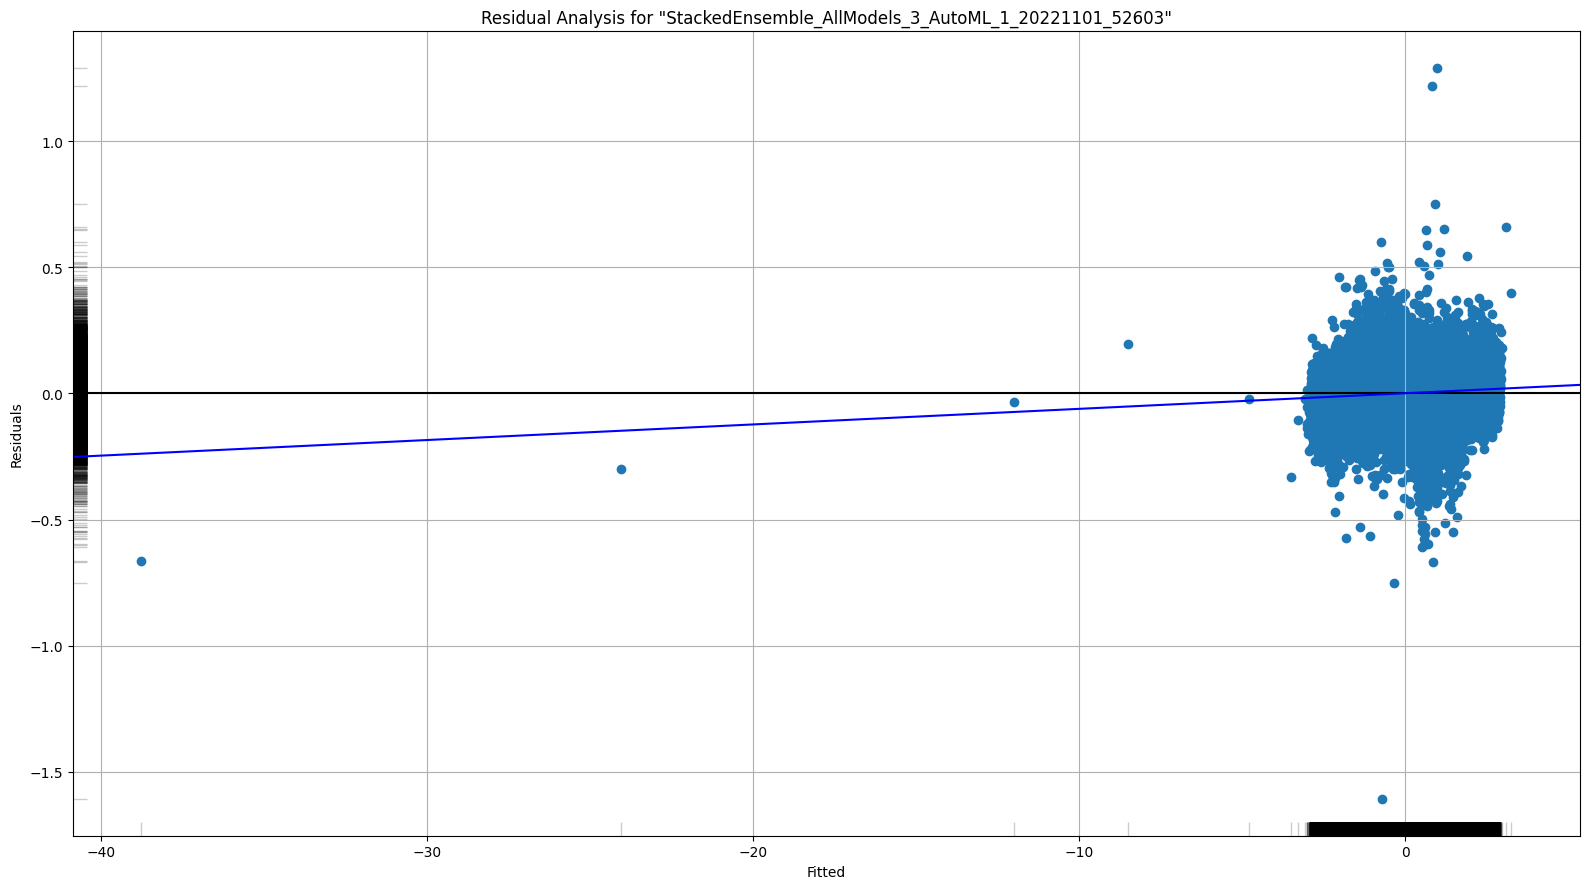

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

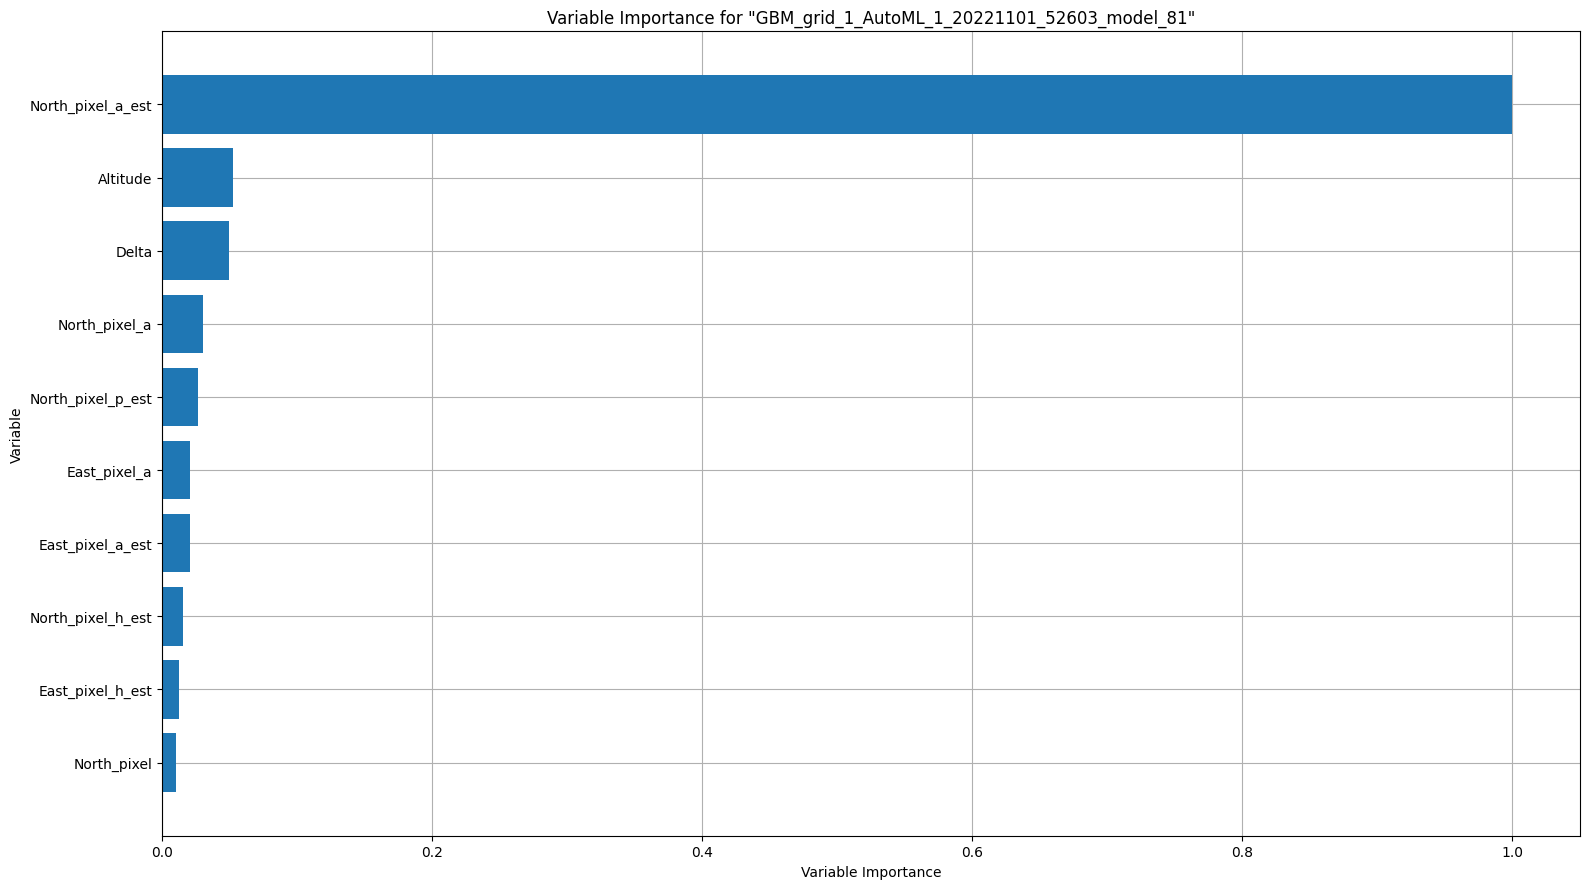

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

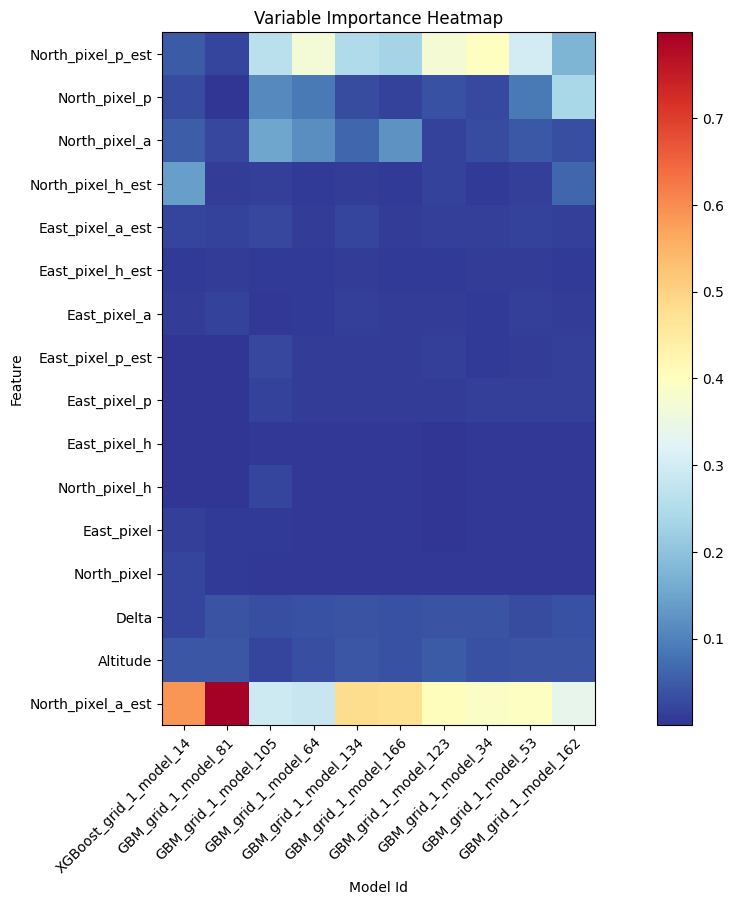

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

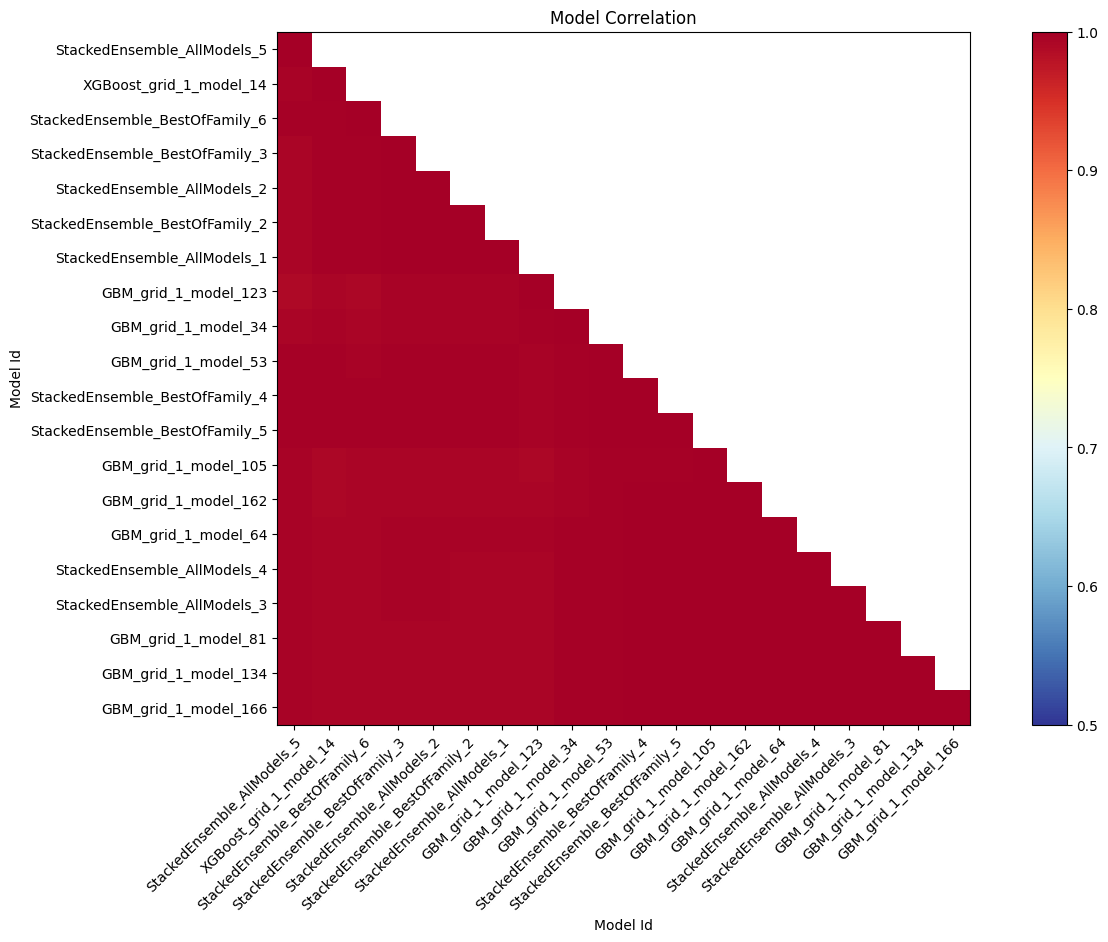

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

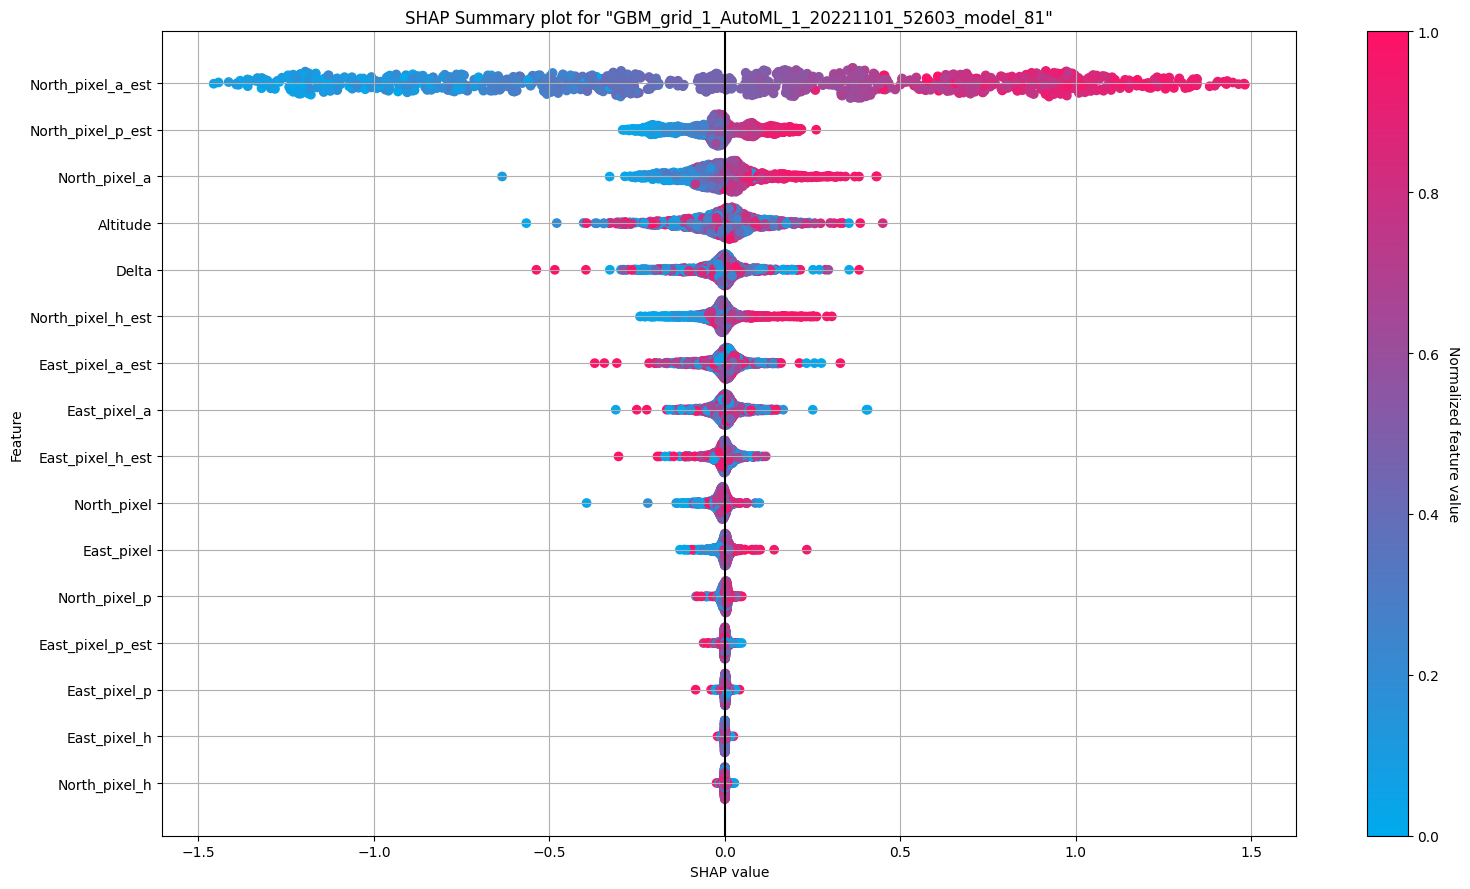

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

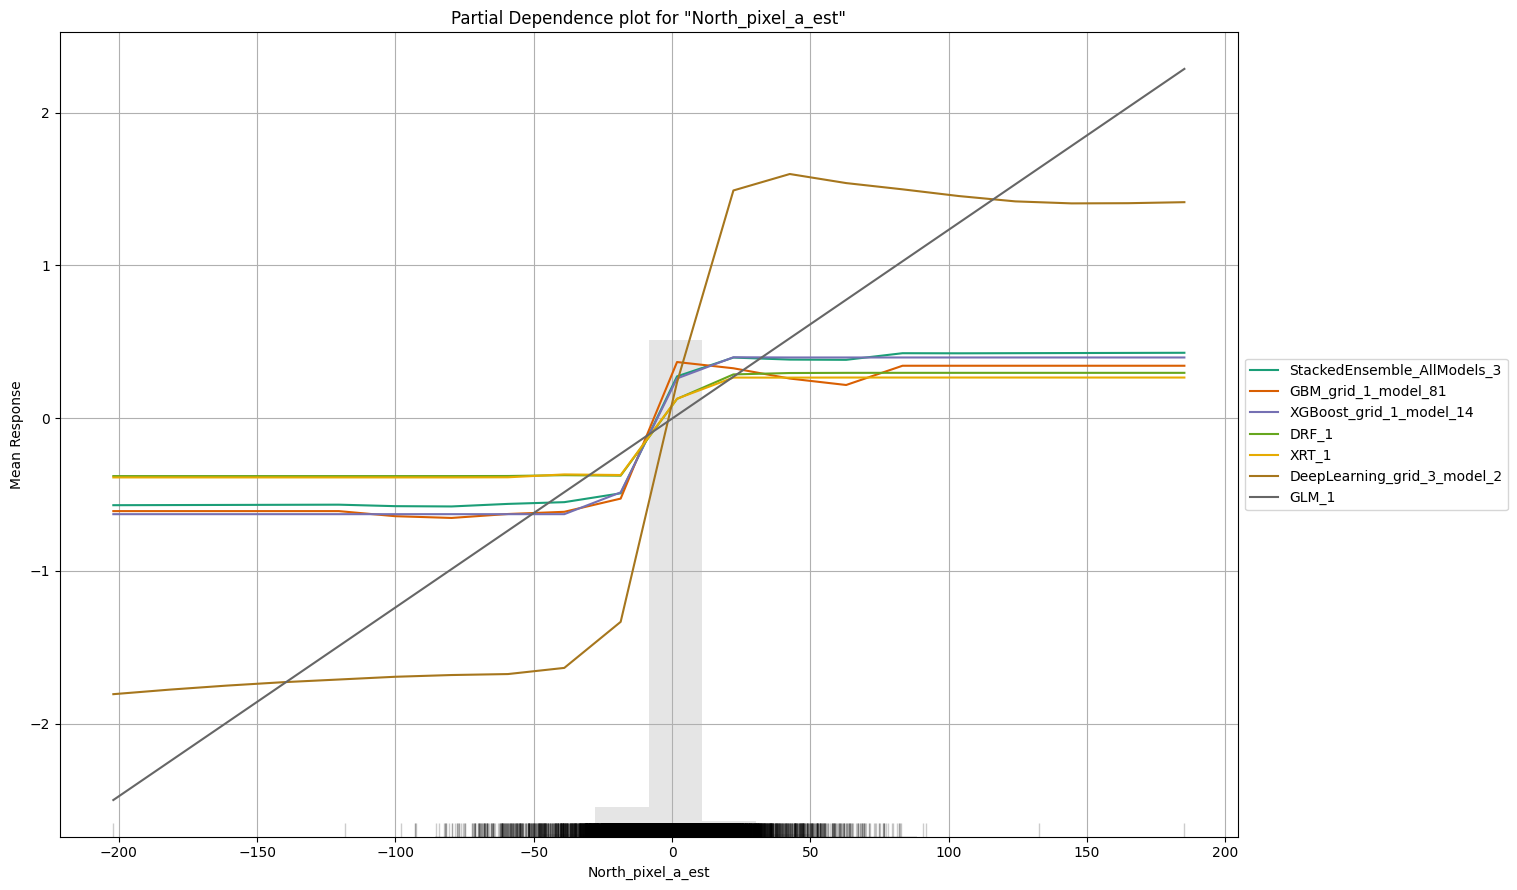

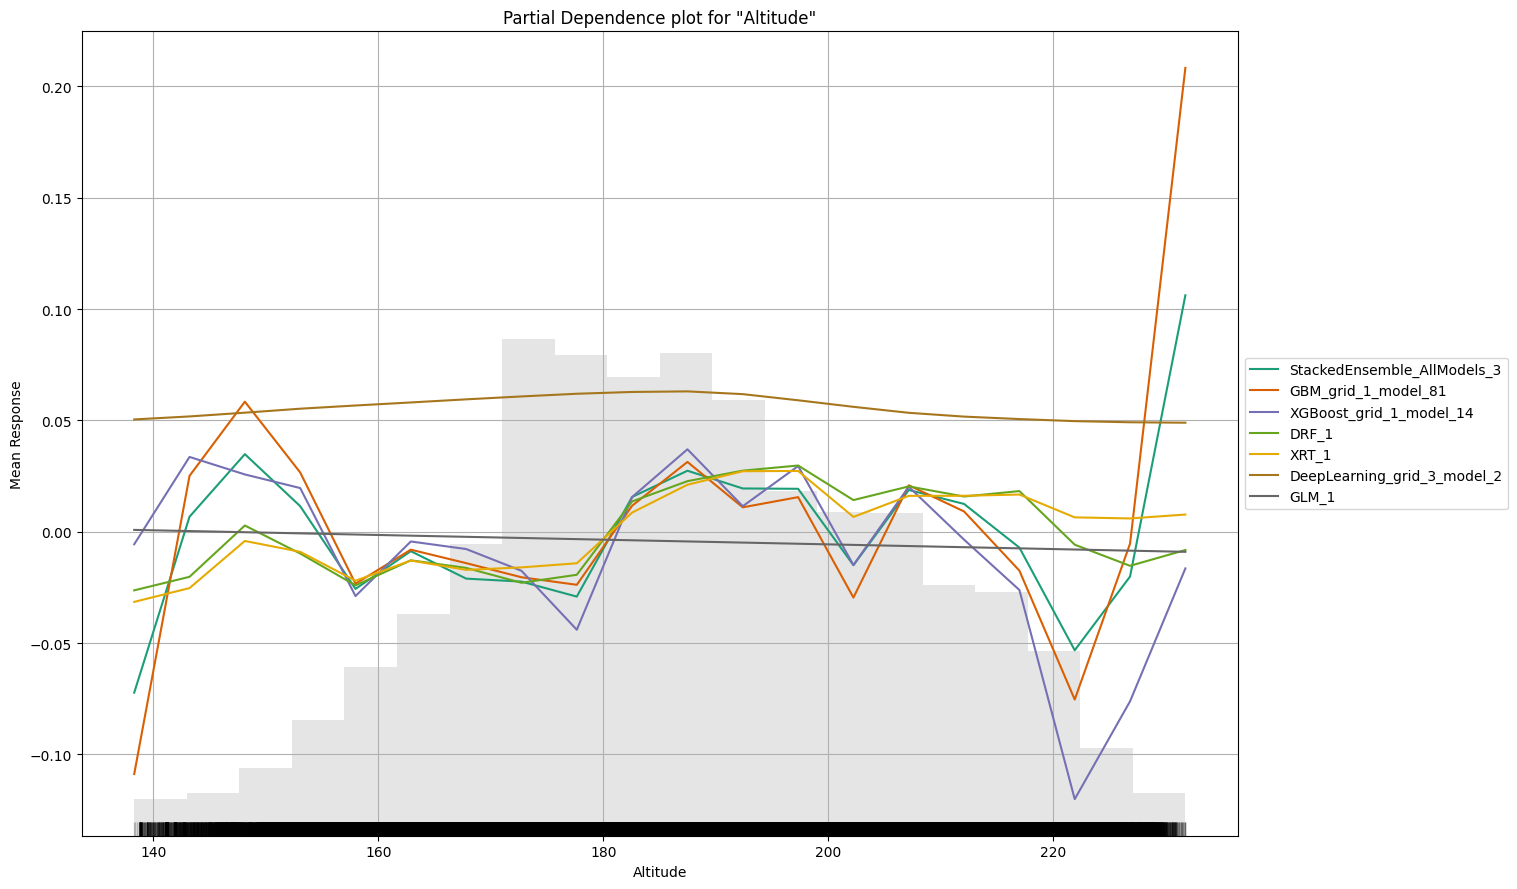

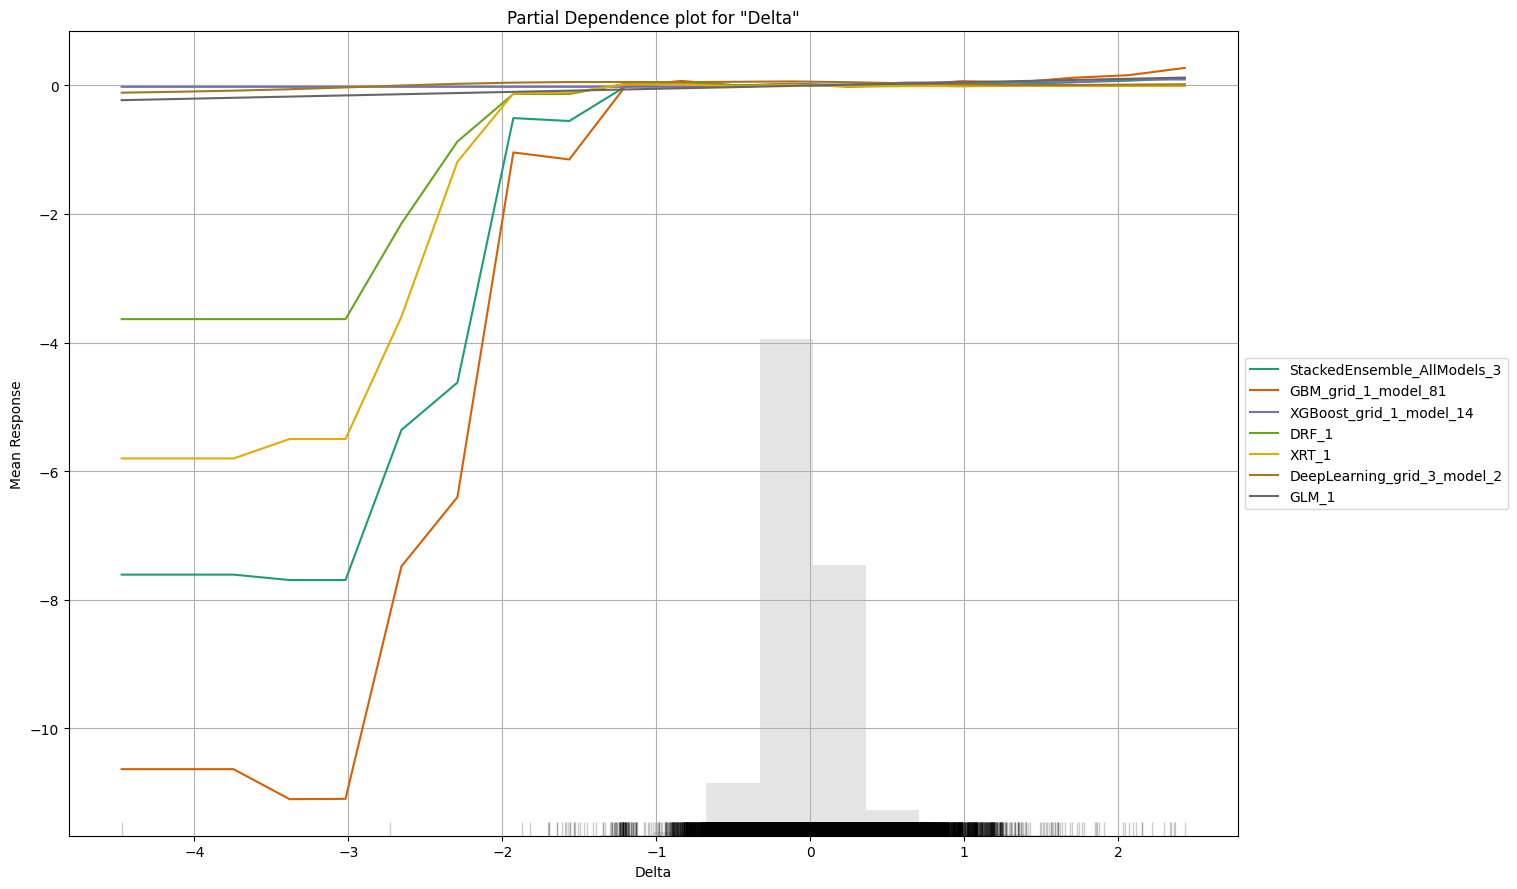

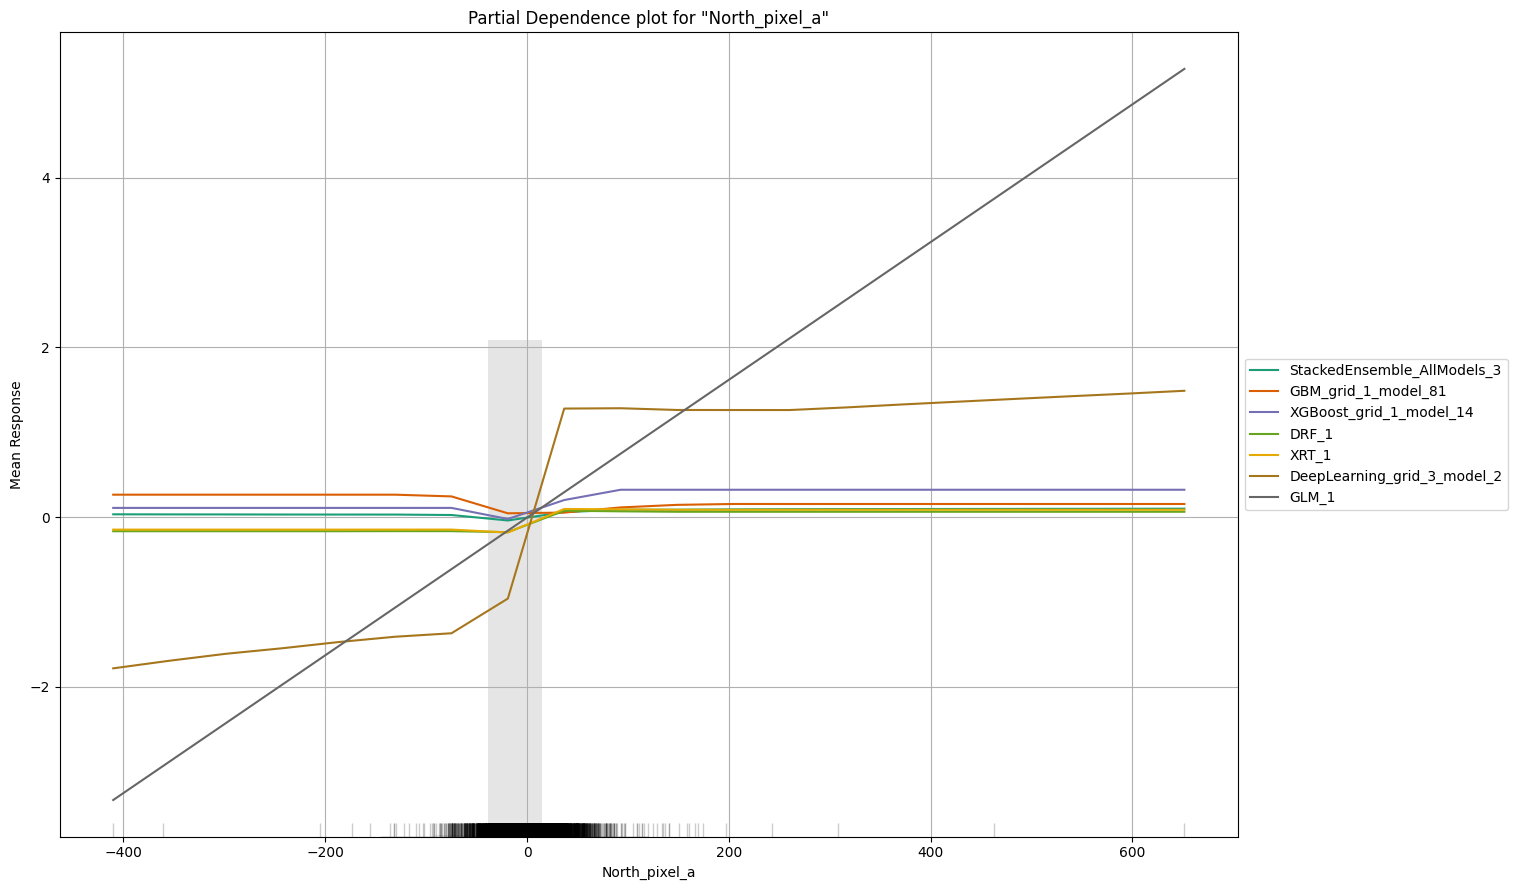

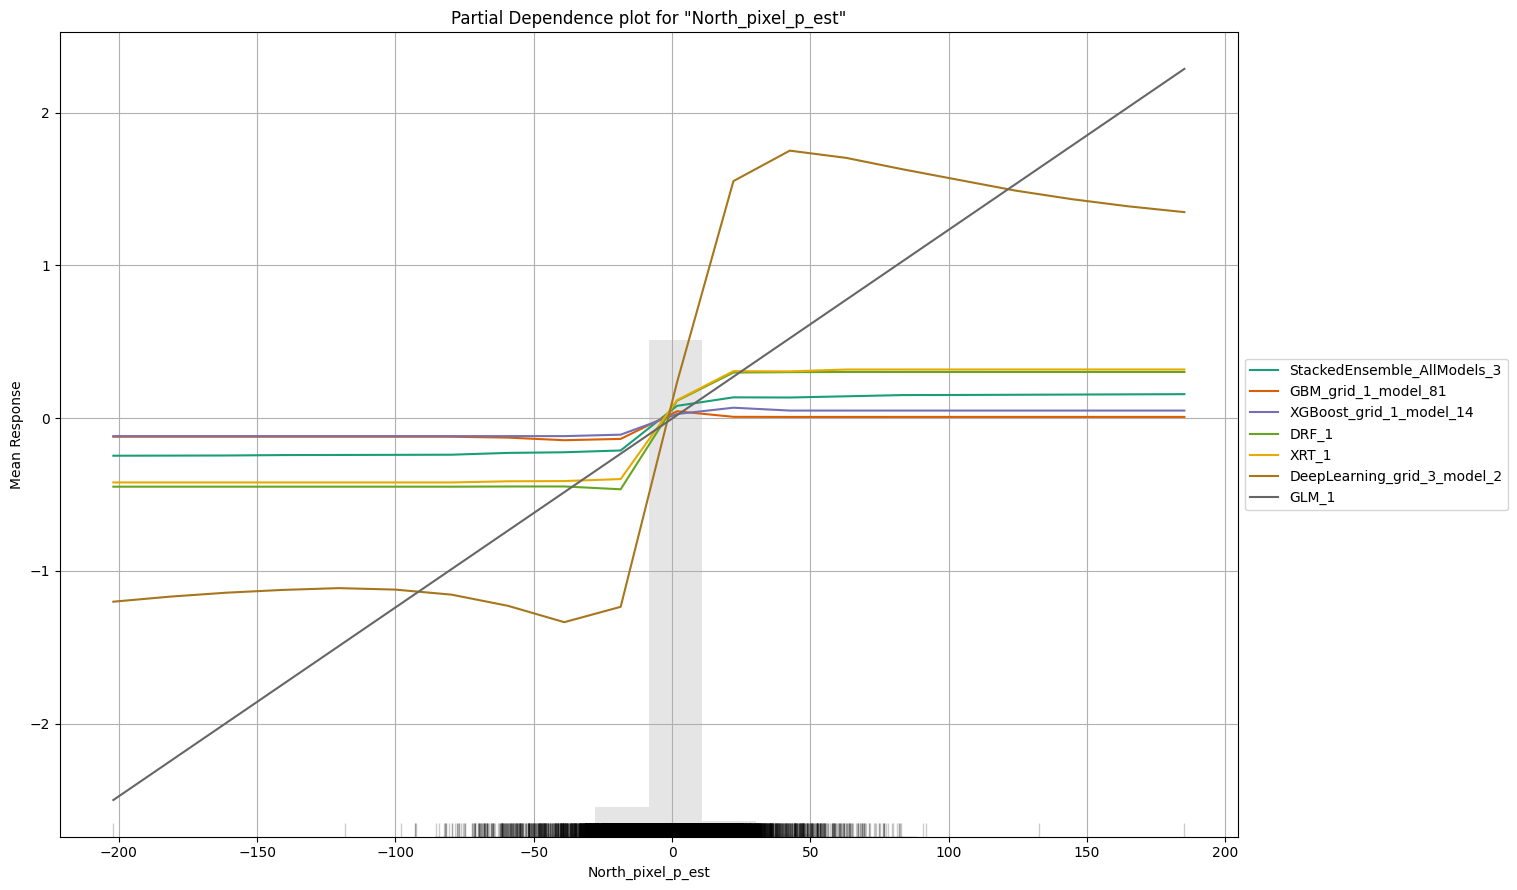

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

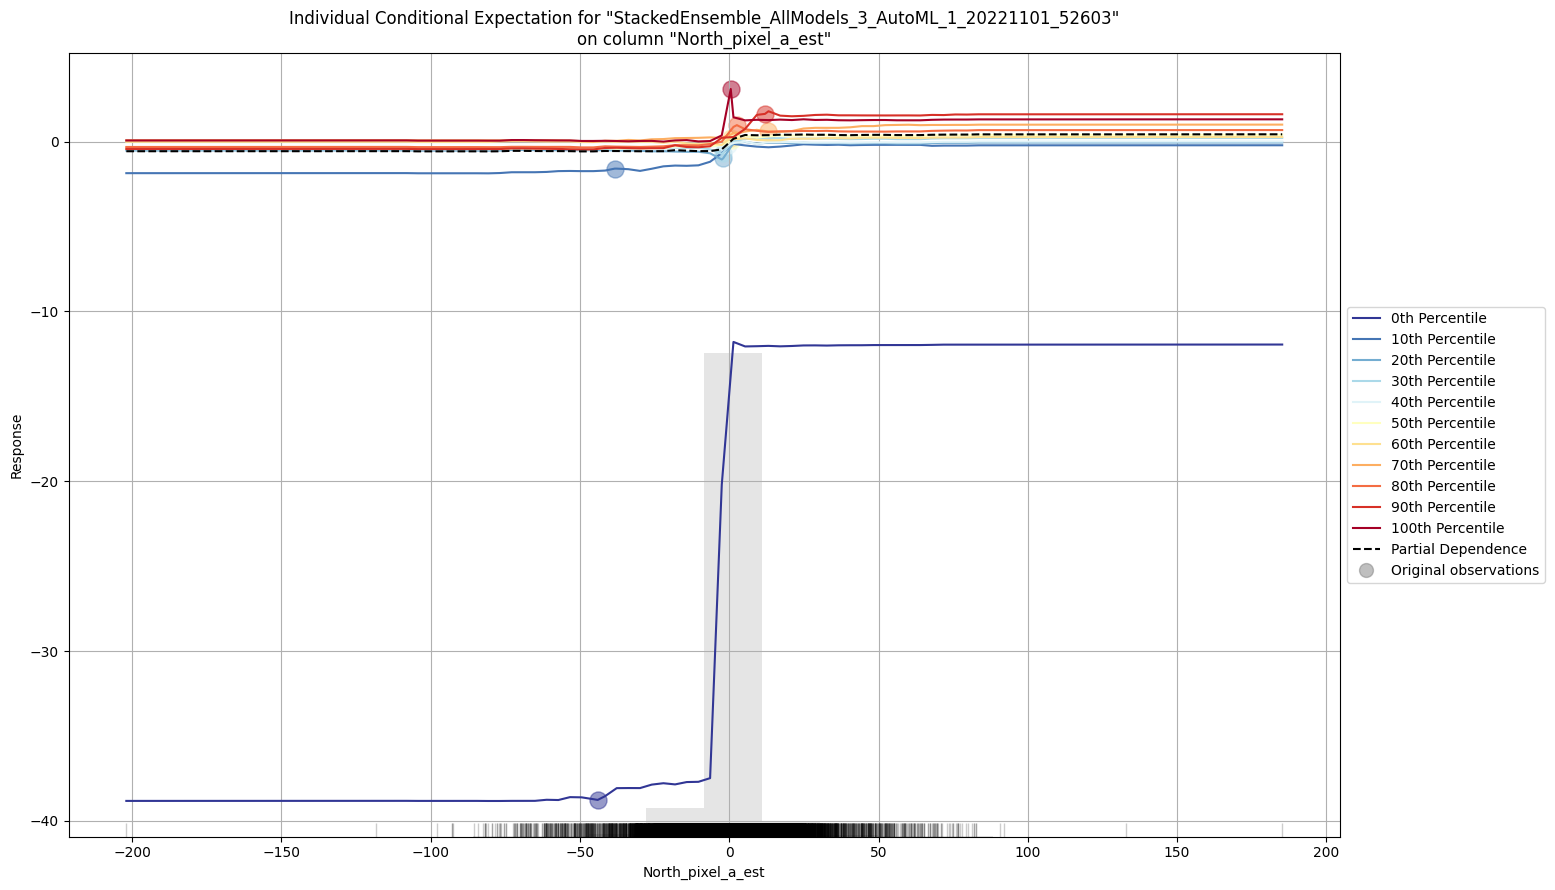

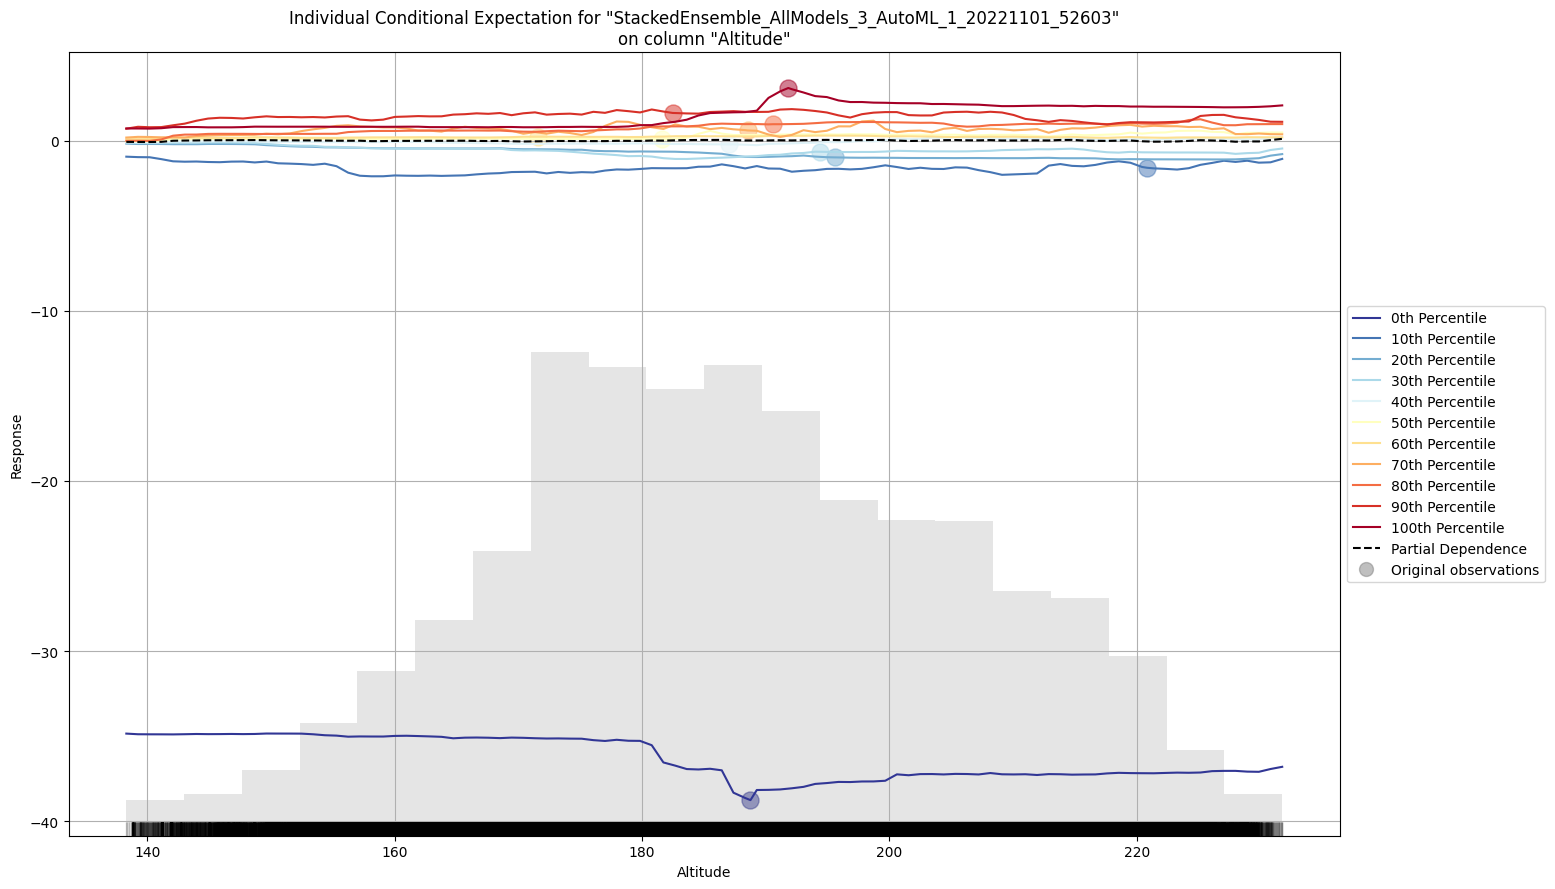

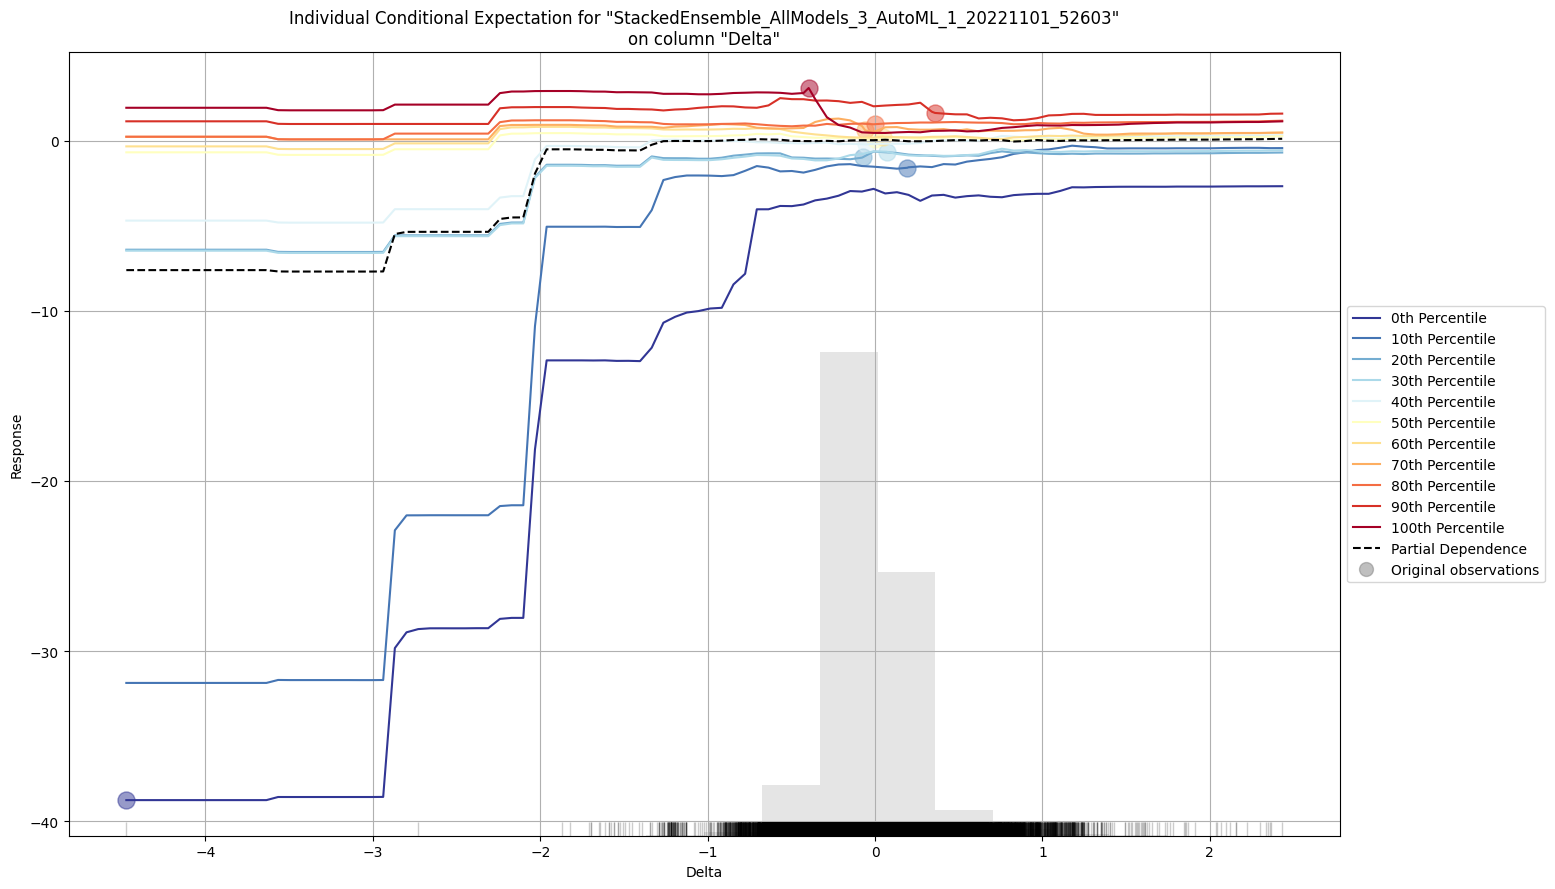

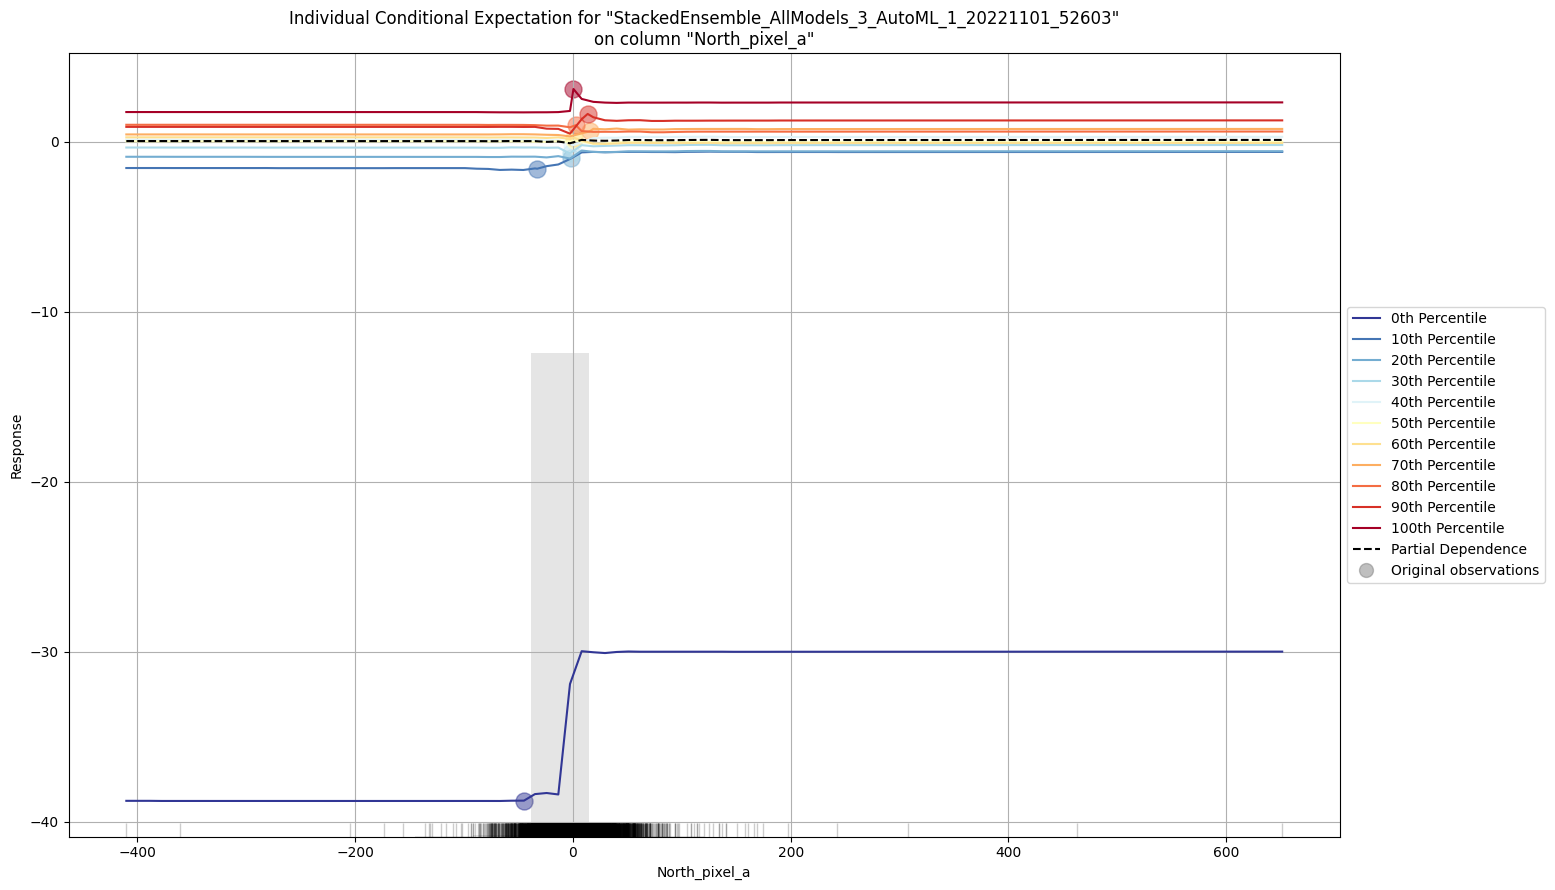

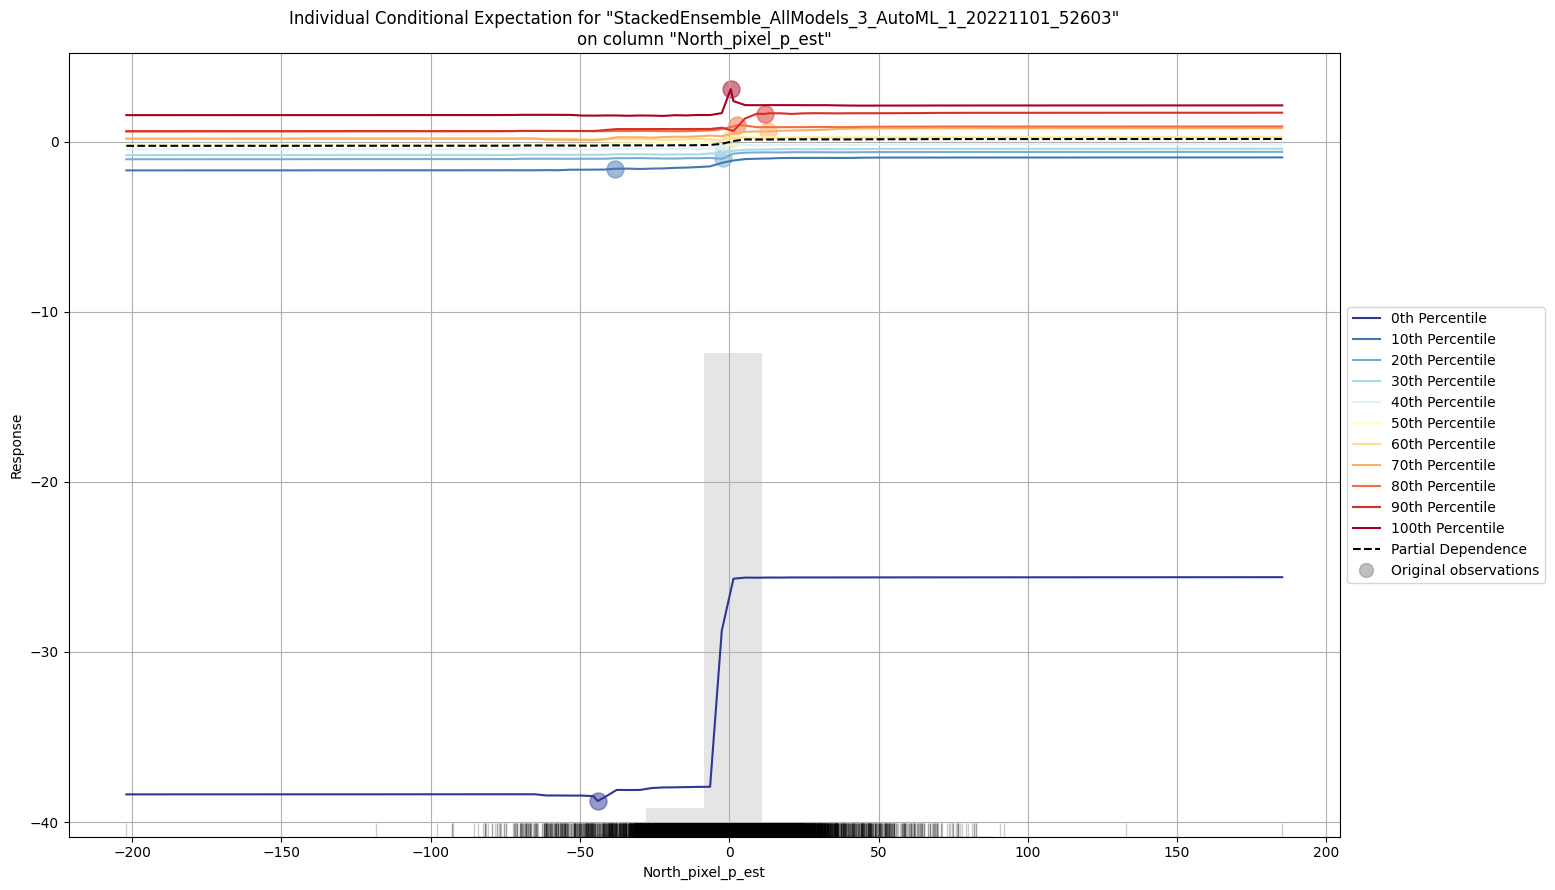

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20221101_52603_model_105,0.0272915,0.000744827,0.0175026,nan,0.000744827,11940,0.00354,GBM
GBM_grid_1_AutoML_1_20221101_52603_model_96,0.0276568,0.0007649,0.0156899,nan,0.0007649,17165,0.003165,GBM
GBM_grid_1_AutoML_1_20221101_52603_model_162,0.0382143,0.00146034,0.024355,nan,0.00146034,10601,0.004368,GBM
XGBoost_grid_1_AutoML_1_20221101_52603_model_73,0.0472009,0.00222793,0.0313089,nan,0.00222793,6270,0.000838,XGBoost
XGBoost_grid_1_AutoML_1_20221101_52603_model_1,0.0498384,0.00248386,0.0321567,nan,0.00248386,5422,0.000946,XGBoost
XGBoost_grid_1_AutoML_1_20221101_52603_model_91,0.0530182,0.00281093,0.0310618,nan,0.00281093,4259,0.000549,XGBoost
GBM_grid_1_AutoML_1_20221101_52603_model_134,0.0560487,0.00314146,0.0326089,nan,0.00314146,9240,0.003327,GBM
StackedEnsemble_AllModels_3_AutoML_1_20221101_52603,0.0561067,0.00314796,0.0337076,nan,0.00314796,3591,0.03022,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20221101_52603,0.0561067,0.00314796,0.0337076,nan,0.00314796,3631,0.028856,StackedEnsemble
GBM_grid_1_AutoML_1_20221101_52603_model_166,0.0637124,0.00405927,0.0384909,nan,0.00405927,11923,0.004676,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [14]:
north_aml.explain(train)

# East Explanation

In [15]:
# # east_aml.explain(train)

In [16]:
h2o.shutdown()

H2O session _sid_a94a closed.


/tmp/ipykernel_263094/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
